In [41]:
import pandas as pd

In [42]:
df = pd.read_csv(r"Delhi_dataset.csv")

In [43]:
df = df.drop(['Unnamed: 0','Balcony','parking','Furnished_status','Lift','Landmarks','desc'], axis=1)

In [44]:
df.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Status,neworold,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,Under Construction,New Property,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,Ready to Move,New Property,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,Ready to Move,New Property,Flat,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,NaN,New Property,Flat,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,Ready to Move,Resale,Flat,4592.592593


In [45]:
df['City'] = df['Address'].apply(lambda x: x.split(",")[-2].strip() if pd.notnull(x) else '')

In [46]:
df['Locality'] = df['Address'].apply(lambda x: x.split(",")[-3].strip() if len(x.split(",")) >= 3 else '')

In [47]:
df.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Status,neworold,type_of_building,Price_sqft,City,Locality
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,Under Construction,New Property,Flat,4148.148148,Noida,Noida Extension
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,Ready to Move,New Property,Flat,5906.040268,Gurgaon,Sector 79
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,Ready to Move,New Property,Flat,6918.238994,Ghaziabad,Vaishali
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,NaN,New Property,Flat,3628.571429,Greater Noida,Sector 1
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,Ready to Move,Resale,Flat,4592.592593,Noida,Sector 128


In [48]:
df1 = df.copy()

In [49]:
df1.drop(columns=['Address','latitude','longitude','Locality','Price_sqft'],inplace=True)

In [50]:
df1.head(1)

,price,area,Bedrooms,Bathrooms,Status,neworold,type_of_building,City
0,5600000.0,1350.0,3.0,3.0,Under Construction,New Property,Flat,Noida


In [51]:
df1.dtypes

price               float64
area                float64
Bedrooms            float64
Bathrooms           float64
Status               object
neworold             object
type_of_building     object
City                 object
dtype: object

In [52]:
df1[['price','area','Bedrooms','Bathrooms']]=df1[['price','area','Bedrooms','Bathrooms']].astype('int64')

In [53]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df1['Status'] = label.fit_transform(df1['Status'])
df1['neworold'] = label.fit_transform(df1['neworold'])
df1['type_of_building'] = label.fit_transform(df1['type_of_building'])
df1['City'] = label.fit_transform(df1['City'])

#df1['Status'].unique()
#df1['neworold'].unique()
#df1['type_of_building'].unique()
df1['City'].unique()

array([14,  3,  1,  2, 11, 12,  8, 13,  0,  5,  9, 10,  6,  7,  4])

In [54]:
'''from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df1[['area','price']]=min_max.fit_transform(df1[['area','price']])'''

"from sklearn.preprocessing import MinMaxScaler\nmin_max=MinMaxScaler()\ndf1[['area','price']]=min_max.fit_transform(df1[['area','price']])"

In [55]:
df1.head()

,price,area,Bedrooms,Bathrooms,Status,neworold,type_of_building,City
0,5600000,1350,3,3,1,0,0,14
1,8800000,1490,3,3,0,0,0,3
2,16500000,2385,4,5,0,0,0,1
3,3810000,1050,2,2,2,0,0,2
4,6200000,1350,2,2,0,1,0,14


In [56]:
features = ['area','Bedrooms','Bathrooms','Status','neworold','type_of_building','City']
X = df1.loc[:, features]
y = df1.loc[:, ['price']]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size= 0.3)

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : ", r2_score(y_test, y_pred))

Mean Squared Error :  11487478419745.447
Root Mean Squared Error :  3389318.2824493553
R2 score :  0.7486685084502942


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

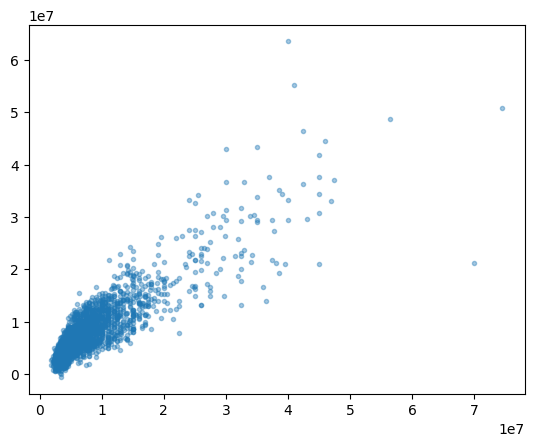

In [61]:
plt.scatter(y_test,y_pred,alpha=0.4,marker=".")
plt.show()

In [62]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

lasso = Lasso()
ridge = Ridge()
rf = RandomForestRegressor()
xgb = XGBRegressor()

lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)

y_pred1 = lasso.predict(X_test)
y_pred2 = ridge.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = xgb.predict(X_test)

c:\Users\Anuradha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [63]:
print("R2 score LR: ", r2_score(y_test, y_pred))
print("R2 score Lasso: ", r2_score(y_test, y_pred1))
print("R2 score Ridge: ", r2_score(y_test, y_pred2))
print("R2 score rf: ", r2_score(y_test, y_pred3))
print("R2 score xgb: ", r2_score(y_test, y_pred4))

R2 score LR:  0.7486685084502942
R2 score Lasso:  0.7486685227199429
R2 score Ridge:  0.7486718227914295
R2 score rf:  0.8657675011552162
R2 score xgb:  0.8417174220085144


In [64]:
import pickle

In [65]:
pickle.dump(rf, open('RF1.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))

In [66]:
X_train.head(1)

,area,Bedrooms,Bathrooms,Status,neworold,type_of_building,City
2776,1079,2,2,0,1,1,3
